In [23]:
import copy
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd 

import sklearn 
import matplotlib.pyplot as plt

from matplotlib import font_manager,rc
font_name=font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font',family=font_name)

#데이터를 불러옴
weather= pd.read_csv("연습.csv", encoding='euc-kr', index_col = 0)
wt=weather
wt

,최고기온(°C),일강수량(mm),최대 순간 풍속(m/s),최대 풍속(m/s),평균 풍속(m/s),풍정합(100m),최소 상대습도(%),평균 상대습도(%),가조시간(hr),평균 전운량(1/10),평균 중하층운량(1/10),평균 지면온도(°C),분류
일시,,,,,,,,,,,,,
2019-01-01,7.0,0.0,13.6,7.6,5.3,4560.0,47.0,61.1,10.0,9.0,9.0,4.8,45
2019-01-02,6.1,NaN,11.4,6.2,3.9,340560.0,53.1,61.0,9.9,8.8,8.8,4.6,45
2019-01-03,8.0,NaN,8.2,5.1,2.7,234000.0,41.2,60.0,9.9,4.1,4.1,5.5,54
2019-01-04,10.0,1.6,7.6,4.6,2.0,174960.0,62.7,78.0,9.9,8.1,6.3,5.2,41
2019-01-05,9.0,NaN,8.9,5.1,3.2,274320.0,49.5,67.0,9.9,5.9,5.1,6.6,52
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-27,7.3,NaN,17.5,9.5,5.2,449640.0,47.0,55.0,10.0,8.6,8.6,6.2,45
2019-12-28,9.7,NaN,6.6,4.0,2.0,169920.0,47.0,58.0,10.0,4.8,3.8,7.2,61
2019-12-29,16.4,11.4,10.8,5.9,2.9,246600.0,64.7,82.0,10.0,9.6,7.0,9.3,36


In [24]:
#정보를 봄
wt.info()

<class 'pandas.core.frame.DataFrame'>
Index: 365 entries, 2019-01-01 to 2019-12-31
Data columns (total 13 columns):
최고기온(°C)          365 non-null float64
일강수량(mm)          108 non-null float64
최대 순간 풍속(m/s)     365 non-null float64
최대 풍속(m/s)        365 non-null float64
평균 풍속(m/s)        364 non-null float64
풍정합(100m)         364 non-null float64
최소 상대습도(%)        365 non-null float64
평균 상대습도(%)        365 non-null float64
가조시간(hr)          365 non-null float64
평균 전운량(1/10)      365 non-null float64
평균 중하층운량(1/10)    365 non-null float64
평균 지면온도(°C)       365 non-null float64
분류                365 non-null int64
dtypes: float64(12), int64(1)
memory usage: 39.9+ KB


In [25]:
wt.head()

,최고기온(°C),일강수량(mm),최대 순간 풍속(m/s),최대 풍속(m/s),평균 풍속(m/s),풍정합(100m),최소 상대습도(%),평균 상대습도(%),가조시간(hr),평균 전운량(1/10),평균 중하층운량(1/10),평균 지면온도(°C),분류
일시,,,,,,,,,,,,,
2019-01-01,7.0,0.0,13.6,7.6,5.3,4560.0,47.0,61.1,10.0,9.0,9.0,4.8,45
2019-01-02,6.1,NaN,11.4,6.2,3.9,340560.0,53.1,61.0,9.9,8.8,8.8,4.6,45
2019-01-03,8.0,NaN,8.2,5.1,2.7,234000.0,41.2,60.0,9.9,4.1,4.1,5.5,54
2019-01-04,10.0,1.6,7.6,4.6,2.0,174960.0,62.7,78.0,9.9,8.1,6.3,5.2,41
2019-01-05,9.0,NaN,8.9,5.1,3.2,274320.0,49.5,67.0,9.9,5.9,5.1,6.6,52


In [26]:
#요약정보를 봄
wt.describe()

,최고기온(°C),일강수량(mm),최대 순간 풍속(m/s),최대 풍속(m/s),평균 풍속(m/s),풍정합(100m),최소 상대습도(%),평균 상대습도(%),가조시간(hr),평균 전운량(1/10),평균 중하층운량(1/10),평균 지면온도(°C),분류
count,365.000000,108.000000,365.000000,365.000000,364.000000,364.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000
mean,20.001644,18.332407,10.303836,6.044658,2.997253,255491.516484,53.710137,69.787671,12.101096,6.149315,4.121370,18.451233,65.863014
std,7.494441,34.024471,4.098088,1.998916,1.088301,94742.513233,15.841142,13.814978,1.524651,2.746632,2.433033,8.219812,19.946574
min,4.000000,0.000000,4.200000,2.800000,1.200000,1416.000000,0.000000,18.000000,9.900000,0.000000,0.000000,3.400000,7.000000
25%,13.400000,1.150000,7.200000,4.600000,2.200000,187020.000000,44.500000,60.000000,10.800000,3.900000,2.300000,10.800000,51.000000
50%,21.400000,4.850000,9.600000,5.700000,2.750000,236520.000000,53.300000,69.000000,12.400000,6.500000,4.100000,19.500000,65.000000
75%,25.900000,18.750000,12.200000,7.100000,3.600000,306990.000000,64.900000,80.000000,13.700000,8.600000,6.000000,25.400000,84.000000
max,35.400000,187.700000,30.400000,17.400000,8.800000,761760.000000,94.700000,99.000000,14.300000,10.000000,9.100000,35.400000,99.000000


In [27]:
#결측치 처리

#일강수량의 nan을 0으로 대체
wt['일강수량(mm)'].fillna(0,inplace=True)
wt

#지점,지점명 컬럼을 제거

#nan 인 행을 제거
wt.dropna(axis=0,inplace=True)

In [28]:
#nan,결측치 확인
wt.isnull().sum()

최고기온(°C)          0
일강수량(mm)          0
최대 순간 풍속(m/s)     0
최대 풍속(m/s)        0
평균 풍속(m/s)        0
풍정합(100m)         0
최소 상대습도(%)        0
평균 상대습도(%)        0
가조시간(hr)          0
평균 전운량(1/10)      0
평균 중하층운량(1/10)    0
평균 지면온도(°C)       0
분류                0
dtype: int64

In [29]:
x,y=wt.iloc[:,2:-1],wt.iloc[:,-1]

In [30]:
print(y)

일시
2019-01-01    45
2019-01-02    45
2019-01-03    54
2019-01-04    41
2019-01-05    52
              ..
2019-12-27    45
2019-12-28    61
2019-12-29    36
2019-12-30    51
2019-12-31    45
Name: 분류, Length: 364, dtype: int64


In [31]:
wt.corr()

,최고기온(°C),일강수량(mm),최대 순간 풍속(m/s),최대 풍속(m/s),평균 풍속(m/s),풍정합(100m),최소 상대습도(%),평균 상대습도(%),가조시간(hr),평균 전운량(1/10),평균 중하층운량(1/10),평균 지면온도(°C),분류
최고기온(°C),1.000000,0.175206,-0.096924,-0.056964,-0.221401,-0.216202,0.315711,0.439160,0.839474,-0.085174,-0.246872,0.955660,0.216157
일강수량(mm),0.175206,1.000000,0.314171,0.289182,0.220952,0.199497,0.338721,0.392572,0.173523,0.304290,0.255761,0.131605,-0.259326
최대 순간 풍속(m/s),-0.096924,0.314171,1.000000,0.959380,0.838739,0.756396,0.076888,0.105571,-0.140761,0.316156,0.411179,-0.162483,-0.373513
최대 풍속(m/s),-0.056964,0.289182,0.959380,1.000000,0.826994,0.765547,0.071070,0.114993,-0.082707,0.278655,0.366372,-0.114021,-0.333675
평균 풍속(m/s),-0.221401,0.220952,0.838739,0.826994,1.000000,0.917876,-0.021487,-0.056008,-0.194272,0.215047,0.386557,-0.242118,-0.321882
풍정합(100m),-0.216202,0.199497,0.756396,0.765547,0.917876,1.000000,-0.020667,-0.059725,-0.181883,0.200713,0.355750,-0.236499,-0.279176
최소 상대습도(%),0.315711,0.338721,0.076888,0.071070,-0.021487,-0.020667,1.000000,0.887414,0.274502,0.453708,0.447447,0.284019,-0.244754
평균 상대습도(%),0.439160,0.392572,0.105571,0.114993,-0.056008,-0.059725,0.887414,1.000000,0.406304,0.494609,0.399907,0.399535,-0.236685
가조시간(hr),0.839474,0.173523,-0.140761,-0.082707,-0.194272,-0.181883,0.274502,0.406304,1.000000,-0.019257,-0.237865,0.899129,0.271198
평균 전운량(1/10),-0.085174,0.304290,0.316156,0.278655,0.215047,0.200713,0.453708,0.494609,-0.019257,1.000000,0.826562,-0.129851,-0.517777


In [32]:
from patsy import dmatrices
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

lm = sm.OLS(wt['분류'],wt[['최고기온(°C)', '일강수량(mm)','최대 순간 풍속(m/s)', '최대 풍속(m/s)', '평균 풍속(m/s)',
       '풍정합(100m)', '최소 상대습도(%)', '평균 상대습도(%)', '가조시간(hr)', '평균 전운량(1/10)',
       '평균 중하층운량(1/10)', '평균 지면온도(°C)']])
results = lm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                     분류   R-squared (uncentered):                   0.948
Model:                            OLS   Adj. R-squared (uncentered):              0.946
Method:                 Least Squares   F-statistic:                              536.2
Date:                Wed, 22 Jan 2020   Prob (F-statistic):                   7.76e-218
Time:                        10:05:57   Log-Likelihood:                         -1517.8
No. Observations:                 364   AIC:                                      3060.
Df Residuals:                     352   BIC:                                      3106.
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
최고기온(°C)           0.1745      0.399      0.437      0.662      -0.611       0.960
일강수량(mm)          -0.1507      0.046     -3.270      0.001      -0.241      -0.060
최대 순간 풍속(m/s)     -0.1854      0.812     -0.228      0.819      -1.782       1.411
최대 풍속(m/s)        -0.4209      1.581     -0.266      0.790      -3.531       2.689
평균 풍속(m/s)        -1.9011      2.437     -0.780      0.436      -6.694       2.892
풍정합(100m)       1.972e-05   2.27e-05      0.868      0.386   -2.49e-05    6.44e-05
최소 상대습도(%)         0.0297      0.125      0.237      0.813      -0.217       0.276
평균 상대습도(%)        -0.0442      0.156     -0.284      0.776      -0.350       0.262
가조시간(hr)           9.1609      0.649     14.116      0.000       7.885      10.437
평균 전운량(1/10)      -2.1170      0.608     -3.479      0.001      -3.314      -0.920
평균 중하층운량(1/10)    -1.6501      0.755     -2.186      0.029      -3.134      -0.166
평균 지면온도(°C)       -1.1662      0.373     -3.128      0.002      -1.900      -0.433
==============================================================================
Omnibus:                       21.404   Durbin-Watson:                   0.599
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               23.492
Skew:                          -0.591   Prob(JB):                     7.92e-06
Kurtosis:                       3.390   Cond. No.                     8.06e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.06e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [33]:
wt=wt[['최고기온(°C)', '일강수량(mm)','최대 순간 풍속(m/s)', '최대 풍속(m/s)', '평균 풍속(m/s)',
       '풍정합(100m)', '최소 상대습도(%)', '평균 상대습도(%)', '가조시간(hr)', '평균 전운량(1/10)',
       '평균 중하층운량(1/10)', '평균 지면온도(°C)']]
wt

,최고기온(°C),일강수량(mm),최대 순간 풍속(m/s),최대 풍속(m/s),평균 풍속(m/s),풍정합(100m),최소 상대습도(%),평균 상대습도(%),가조시간(hr),평균 전운량(1/10),평균 중하층운량(1/10),평균 지면온도(°C)
일시,,,,,,,,,,,,
2019-01-01,7.0,0.0,13.6,7.6,5.3,4560.0,47.0,61.1,10.0,9.0,9.0,4.8
2019-01-02,6.1,0.0,11.4,6.2,3.9,340560.0,53.1,61.0,9.9,8.8,8.8,4.6
2019-01-03,8.0,0.0,8.2,5.1,2.7,234000.0,41.2,60.0,9.9,4.1,4.1,5.5
2019-01-04,10.0,1.6,7.6,4.6,2.0,174960.0,62.7,78.0,9.9,8.1,6.3,5.2
2019-01-05,9.0,0.0,8.9,5.1,3.2,274320.0,49.5,67.0,9.9,5.9,5.1,6.6
...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-27,7.3,0.0,17.5,9.5,5.2,449640.0,47.0,55.0,10.0,8.6,8.6,6.2
2019-12-28,9.7,0.0,6.6,4.0,2.0,169920.0,47.0,58.0,10.0,4.8,3.8,7.2
2019-12-29,16.4,11.4,10.8,5.9,2.9,246600.0,64.7,82.0,10.0,9.6,7.0,9.3


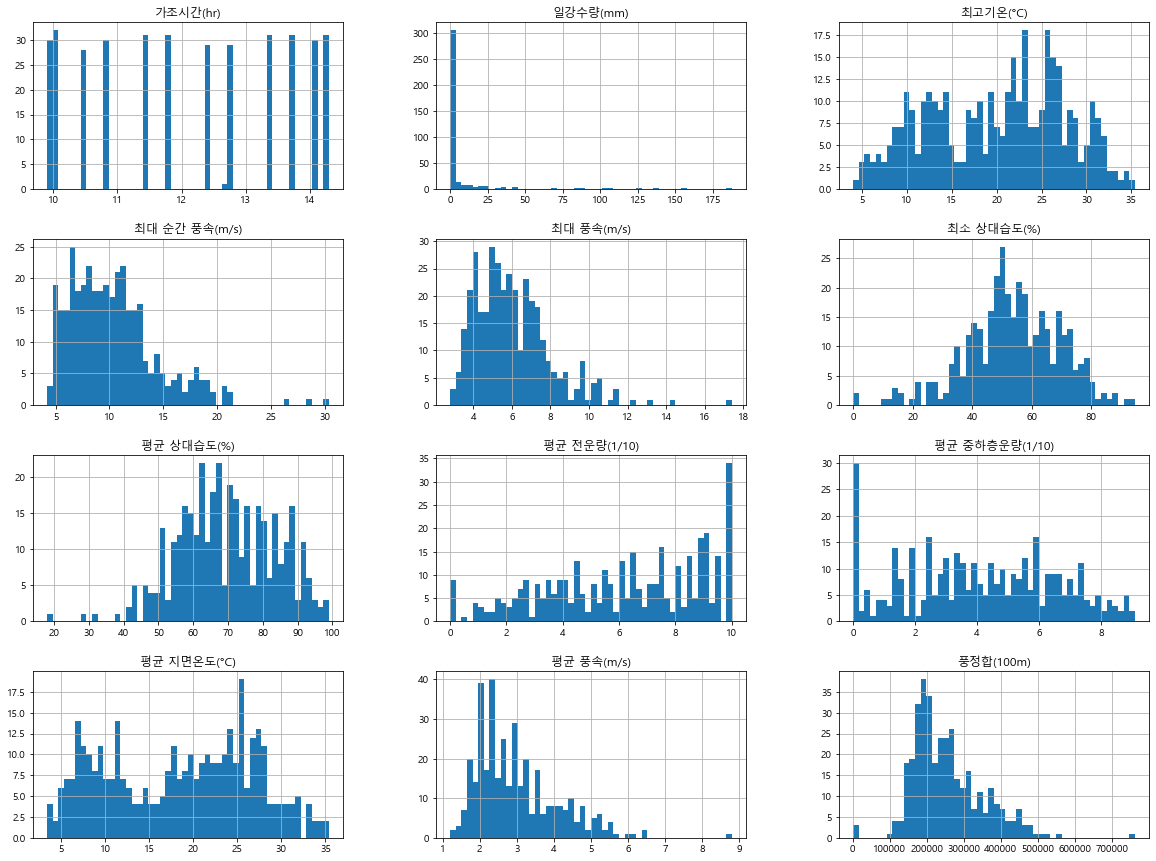

In [34]:
%matplotlib inline
import matplotlib.pyplot as plt
wt.hist(bins=50,figsize=(20,15))
plt.show()

In [35]:
lm = sm.OLS(wt['분류'],wt[['일강수량(mm)','가조시간(hr)','평균 전운량(1/10)',
                      '평균 중하층운량(1/10)', '가조시간(hr)','평균 지면온도(°C)' ]])
results = lm.fit()
results.summary()

KeyError: '분류'

In [36]:
wt=wt[['일강수량(mm)','가조시간(hr)','평균 전운량(1/10)',
                      '평균 중하층운량(1/10)', '가조시간(hr)','평균 지면온도(°C)']]
wt

,일강수량(mm),가조시간(hr),평균 전운량(1/10),평균 중하층운량(1/10),가조시간(hr),평균 지면온도(°C)
일시,,,,,,
2019-01-01,0.0,10.0,9.0,9.0,10.0,4.8
2019-01-02,0.0,9.9,8.8,8.8,9.9,4.6
2019-01-03,0.0,9.9,4.1,4.1,9.9,5.5
2019-01-04,1.6,9.9,8.1,6.3,9.9,5.2
2019-01-05,0.0,9.9,5.9,5.1,9.9,6.6
...,...,...,...,...,...,...
2019-12-27,0.0,10.0,8.6,8.6,10.0,6.2
2019-12-28,0.0,10.0,4.8,3.8,10.0,7.2
2019-12-29,11.4,10.0,9.6,7.0,10.0,9.3


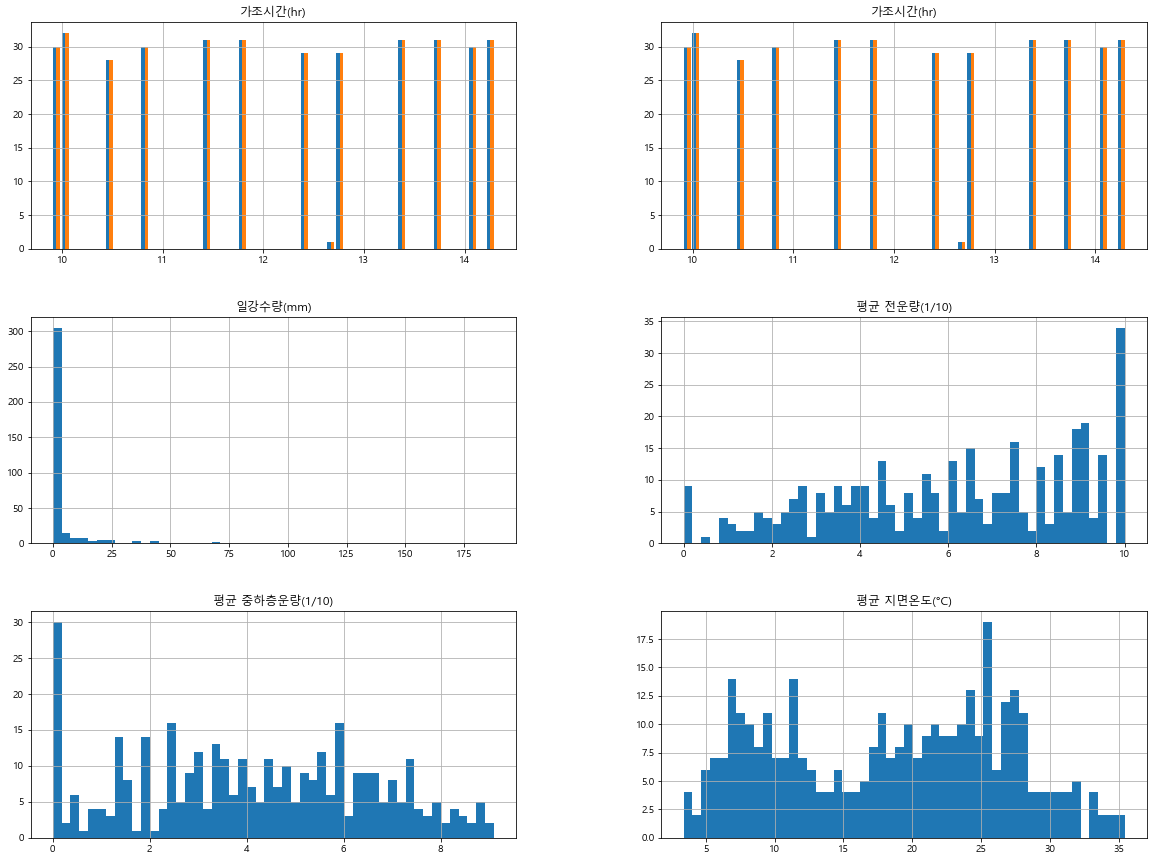

In [37]:
%matplotlib inline
import matplotlib.pyplot as plt
wt.hist(bins=50,figsize=(20,15))
plt.show()

In [38]:
#회귀분석, 데이터나누고, 정규화 시행

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split  
from sklearn.preprocessing import StandardScaler


x=wt.drop("분류",axis=1)
y=wt["분류"]

x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,test_size=0.2)

mul_lr=LinearRegression()

mul_lr.fit(x_train,y_train)


KeyError: "['분류'] not found in axis"

In [156]:
#x (데이터)를 만듦
x=wt.iloc[:,1:]
print(x)

             일시  일강수량(mm)  최대 순간 풍속(m/s)  최대 풍속(m/s)  평균 풍속(m/s)  \
지점                                                                 
184  2019-01-01       0.0           13.6         7.6         5.3   
184  2019-01-02       0.0           11.4         6.2         3.9   
184  2019-01-03       0.0            8.2         5.1         2.7   
184  2019-01-04       1.6            7.6         4.6         2.0   
184  2019-01-05       0.0            8.9         5.1         3.2   
..          ...       ...            ...         ...         ...   
184  2019-12-27       0.0           17.5         9.5         5.2   
184  2019-12-28       0.0            6.6         4.0         2.0   
184  2019-12-29      11.4           10.8         5.9         2.9   
184  2019-12-30       0.0           14.0         7.7         3.8   
184  2019-12-31       0.0           17.3        10.0         5.3   

     평균 이슬점온도(°C)  평균 중하층운량(1/10)  평균 지면온도(°C)  분류  
지점                                                  
184      

In [158]:


# 정규화중 1. standardScaler
# standardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x)
x_scaled = scaler.fit_transform(x)
df = pd.DataFrame(x_scaled, columns = x.columns)
df.hist( figsize = (20 , 15))
plt.show()

ValueError: could not convert string to float: '2019-01-01'

In [112]:
# 정규화중 2 .z-score
import pandas as pd
from sklearn import preprocessing
x= x.values.astype(float)

min_max_scaler = preprocessing.MinMaxScaler()

x_scaled = min_max_scaler.fit_transform(x)
df = pd.DataFrame(x_scaled, columns = x.columns)
df.hist( figsize = (20 , 15))
plt.show()

AttributeError: 'numpy.ndarray' object has no attribute 'values'

In [ ]:
from sklearn.preprocessing import RobustScaler

robustScaler = RobustScaler()
print(robustScaler.fit(train_data))
train_data_robustScaled = robustScaler.transform(train_data)

In [39]:
#회귀분석, 데이터나누고, 정규화 시행

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split  
from sklearn.preprocessing import StandardScaler


x=wt.drop("분류",axis=1)
y=wt["분류"]

x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,test_size=0.2)

mul_lr=LinearRegression()

mul_lr.fit(x_train,y_train)




KeyError: "['분류'] not found in axis"

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler() #객체 인스턴스 
scaler.fit()
data2=scaler.transform(data1)  #transformer(변환기), estimator(주정)
data1.std(),data2.std()
#mul_lr.transform(x_train,y_train)
#mul_lr.fit(X_train,y_train)

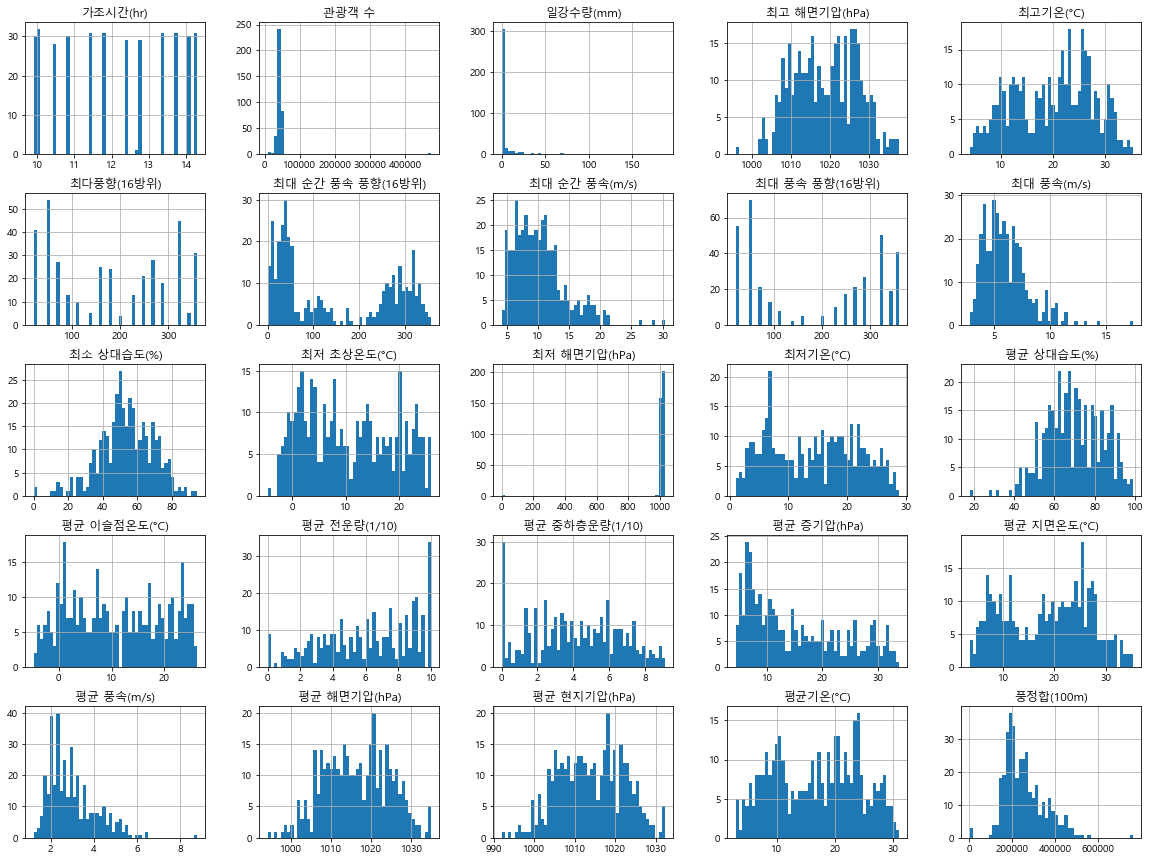

In [66]:
#히스토그램으로 각 컬럼 확인

%matplotlib inline
import matplotlib.pyplot as plt
wt.hist(bins=50,figsize=(20,15))
plt.show()

In [67]:
#상관계수 확인
wt.corr()

,평균기온(°C),최저기온(°C),최고기온(°C),일강수량(mm),최대 순간 풍속(m/s),최대 순간 풍속 풍향(16방위),최대 풍속(m/s),최대 풍속 풍향(16방위),평균 풍속(m/s),풍정합(100m),...,평균 현지기압(hPa),최고 해면기압(hPa),최저 해면기압(hPa),평균 해면기압(hPa),가조시간(hr),평균 전운량(1/10),평균 중하층운량(1/10),평균 지면온도(°C),최저 초상온도(°C),관광객 수
평균기온(°C),1.000000,0.987418,0.987205,0.201296,-0.105491,-0.128662,-0.068592,-0.425239,-0.218597,-0.217904,...,-0.812637,-0.845826,-0.115638,-0.814837,0.846552,-0.035764,-0.195055,0.962770,0.938597,0.103835
최저기온(°C),0.987418,1.000000,0.959040,0.215898,-0.099761,-0.130386,-0.063759,-0.412604,-0.185373,-0.187846,...,-0.813332,-0.850694,-0.113577,-0.815342,0.844837,0.024290,-0.121476,0.951731,0.968880,0.102820
최고기온(°C),0.987205,0.959040,1.000000,0.175206,-0.096924,-0.107189,-0.056964,-0.415458,-0.221401,-0.216202,...,-0.807872,-0.837102,-0.105997,-0.810118,0.839474,-0.085174,-0.246872,0.955660,0.897780,0.102874
일강수량(mm),0.201296,0.215898,0.175206,1.000000,0.314171,-0.061833,0.289182,-0.111388,0.220952,0.199497,...,-0.287460,-0.226932,-0.018409,-0.286882,0.173523,0.304290,0.255761,0.131605,0.278887,-0.107017
최대 순간 풍속(m/s),-0.105491,-0.099761,-0.096924,0.314171,1.000000,0.083996,0.959380,0.114589,0.838739,0.756396,...,-0.059654,0.041164,-0.025309,-0.058626,-0.140761,0.316156,0.411179,-0.162483,-0.021473,-0.114855
최대 순간 풍속 풍향(16방위),-0.128662,-0.130386,-0.107189,-0.061833,0.083996,1.000000,0.054988,0.555403,0.186656,0.166007,...,0.099777,0.113194,0.078815,0.099634,-0.156660,-0.018684,0.080704,-0.139615,-0.113206,-0.044740
최대 풍속(m/s),-0.068592,-0.063759,-0.056964,0.289182,0.959380,0.054988,1.000000,0.052113,0.826994,0.765547,...,-0.106139,-0.012237,-0.055114,-0.105197,-0.082707,0.278655,0.366372,-0.114021,0.010029,-0.088464
최대 풍속 풍향(16방위),-0.425239,-0.412604,-0.415458,-0.111388,0.114589,0.555403,0.052113,1.000000,0.246270,0.229524,...,0.348032,0.365902,0.023258,0.348808,-0.408900,-0.040822,0.079527,-0.426870,-0.379541,-0.081972
평균 풍속(m/s),-0.218597,-0.185373,-0.221401,0.220952,0.838739,0.186656,0.826994,0.246270,1.000000,0.917876,...,0.040486,0.113914,-0.013261,0.041557,-0.194272,0.215047,0.386557,-0.242118,-0.087492,-0.104828
풍정합(100m),-0.217904,-0.187846,-0.216202,0.199497,0.756396,0.166007,0.765547,0.229524,0.917876,1.000000,...,0.042088,0.106642,-0.014291,0.043177,-0.181883,0.200713,0.355750,-0.236499,-0.097210,-0.074622


In [70]:
#회귀분석, 데이터나누고, 정규화 시행

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split  
from sklearn.preprocessing import StandardScaler


x=wt.drop("관광객 수",axis=1)
y=wt["관광객 수"]

x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,test_size=0.2)

mul_lr=LinearRegression()

mul_lr.fit_transform(x_train,y_train)

#mul_lr.fit(X_train,y_train)



AttributeError: 'LinearRegression' object has no attribute 'fit_transform'

In [38]:
y_pred=mul_lr.predict(x_test)
y_pred

NotFittedError: This LinearRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.

In [35]:
from sklearn.metrics import r2_score
print('다중선형회귀, R2:{:.4f}'.format(r2_score(y_test,y_pred)))

다중선형회귀, R2:-0.0119


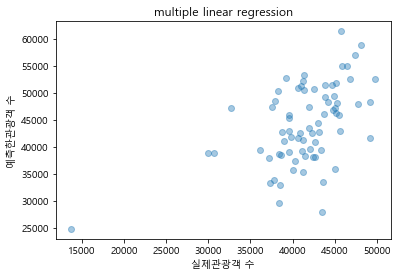

In [237]:
plt.scatter(y_test,y_pred,alpha=0.4)
plt.xlabel("실제관광객 수")
plt.ylabel("예측한관광객 수")
plt.title("multiple linear regression")
plt.show()

In [238]:
print(mul_lr.coef_)

[ 2.77330453e+03 -1.40106126e+03 -1.35646706e+03 -1.44586834e+02
 -1.08008291e+03  6.24014409e-01  1.80550112e+03  5.34783547e-01
 -2.31504619e+03  2.52651527e-02 -3.28886403e+00 -5.52745651e+01
  5.68062027e+01  4.59726296e+02 -1.11987220e+03 -2.37298258e+04
  2.44416944e+02 -6.05660905e+00  2.36232206e+04  2.13356061e+03
 -1.16440938e+03  3.97592650e+02  6.93112874e+02  4.44071974e+02]


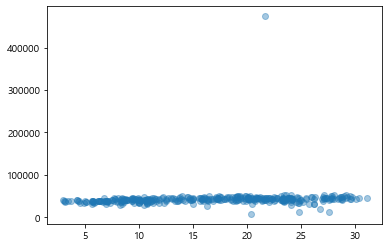

In [209]:
plt.scatter(wt[['평균기온(°C)']],wt[["관광객 수"]],alpha=0.4)
plt.show()

In [239]:
from sklearn.svm import SVC
svc=SVC()
svc.fit(x_train,y_train)
y_pred=svc.predict(x_test)

from sklearn.metrics import accuracy_score
print('서포트벡터머신, 정확도: {:.2f}%'.format(accuracy_score(y_test,y_pred)*100))


서포트벡터머신, 정확도: 0.00%


In [240]:
from sklearn.ensemble import RandomForestRegressor

rf=RandomForestRegressor(max_depth=5)
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)
print('단순 결정 트리 회귀, R2: {:.4f}'.format(r2_score(y_test,y_pred)))

단순 결정 트리 회귀, R2: -19.2544


In [241]:
from sklearn.pipeline import make_pipeline

In [217]:
from sklearn.model_selection import GridSearchCV #파라미터 
from sklearn.preprocessing import PolynomialFeatures

#
def PolynoimalRegression(degree=2,**kwargs):
    return make_pipeline(PolynomialFeatures(degree),
                        LinearRegression(**kwargs))
#0~20
#model 의 hyper parameter
param_grid={'polynomialfeatures__degree':np.arange(21), #21
           'linearregression__fit_intercept':[True,False], #2
           'linearregression__normalize':[True,False]} #2

In [218]:
#cross validation 교차검증
grid=GridSearchCV(PolynoimalRegression(),param_grid,cv=7)

In [219]:
grid.fit(x,y)

KeyboardInterrupt: 

In [ ]:
grid.best_params_ #비선형회귀 4차일경우 가장 적합하다.

In [ ]:
grid.best_estimator_ #제일 좋은 ,최적의 model

In [ ]:
grid.best_score_

In [ ]:
import matplotlib.pyplot as plt
model=grid.best_estimator_

X_test=np.linspace(-0.1,1.1,500)[:,None]
plt.scatter(X.ravel(),y)  #차수를 일치시켜야함?
lim=plt.axis()
y_test=model.fit(X,y).predict(X_test)
plt.plot(X_test.ravel(),y_test)
plt.axis(lim)

In [179]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(x_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [180]:
x_train=scaler.transform(x_train)
x_test=scaler.transform(x_test)

In [185]:
from sklearn.neural_network import MLPClassifier
mlp=MLPClassifier(hidden_layer_sizes=(30,30,30))
mlp.fit(x_train,y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(30, 30, 30), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)